In [1]:
import pandas as pd
import numpy as np

import requests
from requests import get
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': [15, 12]}, font_scale=1.2)

# Data Scraping 

In [52]:
titles = []
years = []
time = []
imdb_ratings = []
metascores = []
votes = []
us_gross = []
genres = []

In [53]:
pages = np.arange(1, 10001, 50)
for page in pages:
    # Getting the contents from the each url
    page = requests.get('https://www.imdb.com/search/title/?genres=action&sort=num_votes,desc&start='+str(page)+'&explore=title_type,genres&ref_=adv_nxt')
     #'&explore=title_type,genres&ref_=adv_nxt'
    soup = BeautifulSoup(page.text, 'html.parser')
    # Aiming the part of the html we want to get the information from
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')
    
    # Controling the loop’s rate by pausing the execution of the loop for a specified amount of time
    # Waiting time between requests for a number between 2-10 seconds    
    for container in movie_div:
        # Scraping the movie's name
        name = container.h3.a.text
        titles.append(name)
        
        # Scraping the movie's year
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)
        
        # Scraping the movie's length
        runtime = container.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else '-'
        time.append(runtime)
        
        # Scraping the rating
        imdb = float(container.find('strong').text) if container.find('strong') else '-'
        imdb_ratings.append(imdb)
        
        genre = container.find('span', class_='genre').text if container.p.find('span', class_='genre') else '-'
        genres.append(genre.strip())
        
        # Scraping the metascore
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(m_score)
        
        # Scraping votes and gross earnings
        nv = container.find_all('span', attrs={'name':'nv'}) 
        vote = nv[0].text if container.find_all('span', attrs={'name':'nv'}) else '-'
        votes.append(vote)
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)
        

In [54]:
pages2 = np.arange(1, 10001, 50)
for page in pages2:
    # Getting the contents from the each url
    page = requests.get('https://www.imdb.com/search/title/?genres=mystery&sort=num_votes,desc&start='+str(page)+'&explore=title_type,genres&ref_=adv_nxt')
     #'&explore=title_type,genres&ref_=adv_nxt'
    soup = BeautifulSoup(page.text, 'html.parser')
    # Aiming the part of the html we want to get the information from
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')
    
    # Controling the loop’s rate by pausing the execution of the loop for a specified amount of time
    # Waiting time between requests for a number between 2-10 seconds    
    for container in movie_div:
        # Scraping the movie's name
        name = container.h3.a.text
        titles.append(name)
        
        # Scraping the movie's year
        year = container.h3.find('span', class_='lister-item-year').text
        years.append(year)
        
        # Scraping the movie's length
        runtime = container.find('span', class_='runtime').text if container.p.find('span', class_='runtime') else '-'
        time.append(runtime)
        
        # Scraping the rating
        imdb = float(container.find('strong').text) if container.find('strong') else '-'
        imdb_ratings.append(imdb)
        
        genre = container.find('span', class_='genre').text if container.p.find('span', class_='genre') else '-'
        genres.append(genre.strip())
        
        # Scraping the metascore
        m_score = container.find('span', class_='metascore').text if container.find('span', class_='metascore') else '-'
        metascores.append(m_score)
        
        # Scraping votes and gross earnings
        nv = container.find_all('span', attrs={'name':'nv'}) 
        vote = nv[0].text if container.find_all('span', attrs={'name':'nv'}) else '-'
        votes.append(vote)
        grosses = nv[1].text if len(nv) > 1 else '-'
        us_gross.append(grosses)

In [120]:
movies = pd.DataFrame({'movie':titles,
                       'year':years,
                       'time_minute':time,
                       'imdb_rating':imdb_ratings,
                       'metascore':metascores,
                       'vote':votes,
                       'gross_earning':us_gross,
                       'genre':genres})

movies

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,genre
0,The Dark Knight,(2008),152 min,9.0,84,"2,407,428",$534.86M,"Action, Crime, Drama"
1,Inception,(2010),148 min,8.8,74,"2,159,698",$292.58M,"Action, Adventure, Sci-Fi"
2,Game of Thrones,(2011–2019),57 min,9.2,-,"1,863,663",-,"Action, Adventure, Drama"
3,The Matrix,(1999),136 min,8.7,73,"1,745,004",$171.48M,"Action, Sci-Fi"
4,The Lord of the Rings: The Fellowship of the Ring,(2001),178 min,8.8,92,"1,724,248",$315.54M,"Action, Adventure, Drama"
...,...,...,...,...,...,...,...,...
19995,They Only Kill Their Masters,(1972),97 min,6.2,-,"1,114",-,"Mystery, Romance, Thriller"
19996,Cake,(I) (2018),125 min,7.7,-,"1,113",-,"Drama, Mystery, Romance"
19997,Steven Universe,(2013–2020),11 min,9.0,-,"1,113",-,"Animation, Short, Action"
19998,The Mentalist,(2008–2015),83 min,8.8,-,"1,113",-,"Crime, Drama, Mystery"


# data cleaning 

In [121]:
movies['time_minute'] = movies['time_minute'].str.extract('(\d+)')
movies['time_minute'] = pd.to_numeric(movies['time_minute'], errors='coerce')
movies['metascore'] = movies['metascore'].str.extract('(\d+)')
movies['metascore'] = pd.to_numeric(movies['metascore'], errors='coerce')
movies['vote'] = movies['vote'].str.replace(',', '').astype(int)
movies['gross_earning'] = movies['gross_earning'].map(lambda x: x.lstrip('$').rstrip('M'))
movies['gross_earning'] = pd.to_numeric(movies['gross_earning'], errors='coerce')


In [128]:
movies['year'] = movies['year'].map(lambda x: x.lstrip('(').rstrip(')'))

In [129]:
movies['year'] = movies['year'].map(lambda x: x.lstrip('VI)').rstrip(')'))

In [130]:
movies['year'] = movies['year'].str.replace('(','')


In [131]:
movies["year"] = pd.to_numeric(movies["year"])

In [71]:
movies.head(1980)

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,genre
0,The Dark Knight,2008,152.0,9.0,84.0,2407428,534.86,"Action, Crime, Drama"
1,Inception,2010,148.0,8.8,74.0,2159698,292.58,"Action, Adventure, Sci-Fi"
3,The Matrix,1999,136.0,8.7,73.0,1745004,171.48,"Action, Sci-Fi"
4,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,8.8,92.0,1724248,315.54,"Action, Adventure, Drama"
5,The Lord of the Rings: The Return of the King,2003,201.0,8.9,94.0,1703012,377.85,"Action, Adventure, Drama"
...,...,...,...,...,...,...,...,...
10197,Pokémon: Detective Pikachu,2019,104.0,6.6,53.0,148594,144.11,"Action, Adventure, Comedy"
10199,Pandorum,2009,108.0,6.7,28.0,146922,10.33,"Action, Horror, Mystery"
10200,State of Play,2009,127.0,7.1,64.0,146874,37.02,"Crime, Drama, Mystery"
10201,The Gift,VI) 2015,108.0,7.0,77.0,146858,43.77,"Drama, Mystery, Thriller"


In [115]:
movies.dtypes


year               int64
time_minute      float64
imdb_rating      float64
metascore        float64
vote               int32
gross_earning    float64
genre              int64
dtype: object

In [122]:
movies.isnull().sum()


movie                0
year                 0
time_minute        739
imdb_rating          0
metascore        16270
vote                 0
gross_earning    16458
genre                0
dtype: int64

In [123]:
movies.dropna(axis = 0, inplace=True)

In [124]:
len(movies)

2806

In [125]:
movies

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,genre
0,The Dark Knight,(2008),152.0,9.0,84.0,2407428,534.86,"Action, Crime, Drama"
1,Inception,(2010),148.0,8.8,74.0,2159698,292.58,"Action, Adventure, Sci-Fi"
3,The Matrix,(1999),136.0,8.7,73.0,1745004,171.48,"Action, Sci-Fi"
4,The Lord of the Rings: The Fellowship of the Ring,(2001),178.0,8.8,92.0,1724248,315.54,"Action, Adventure, Drama"
5,The Lord of the Rings: The Return of the King,(2003),201.0,8.9,94.0,1703012,377.85,"Action, Adventure, Drama"
...,...,...,...,...,...,...,...,...
19166,Submission,(2017),106.0,5.7,52.0,1261,0.04,"Drama, Mystery"
19404,Rollover,(1981),116.0,5.4,36.0,1214,10.85,"Drama, Mystery, Romance"
19665,The Reconstruction of William Zero,(2014),98.0,5.4,57.0,1165,0.00,"Drama, Mystery, Sci-Fi"
19719,War of the Worlds: Goliath,(2012),85.0,5.4,33.0,1158,0.01,"Animation, Action, Adventure"


In [126]:
movies.duplicated().sum()


132

In [127]:
movies.drop_duplicates(inplace = True)

# Analysis and Visualization 

## Analysis questions 
> 1 - what is the most years that has produced films  
2 - what is the average time of the movies  
3 - what is the average movies rating  
4 - what is the average metascore  
5 - what is the average movies vote  
6 - what is the average gross earning  
7 - what is the top 10 genres  




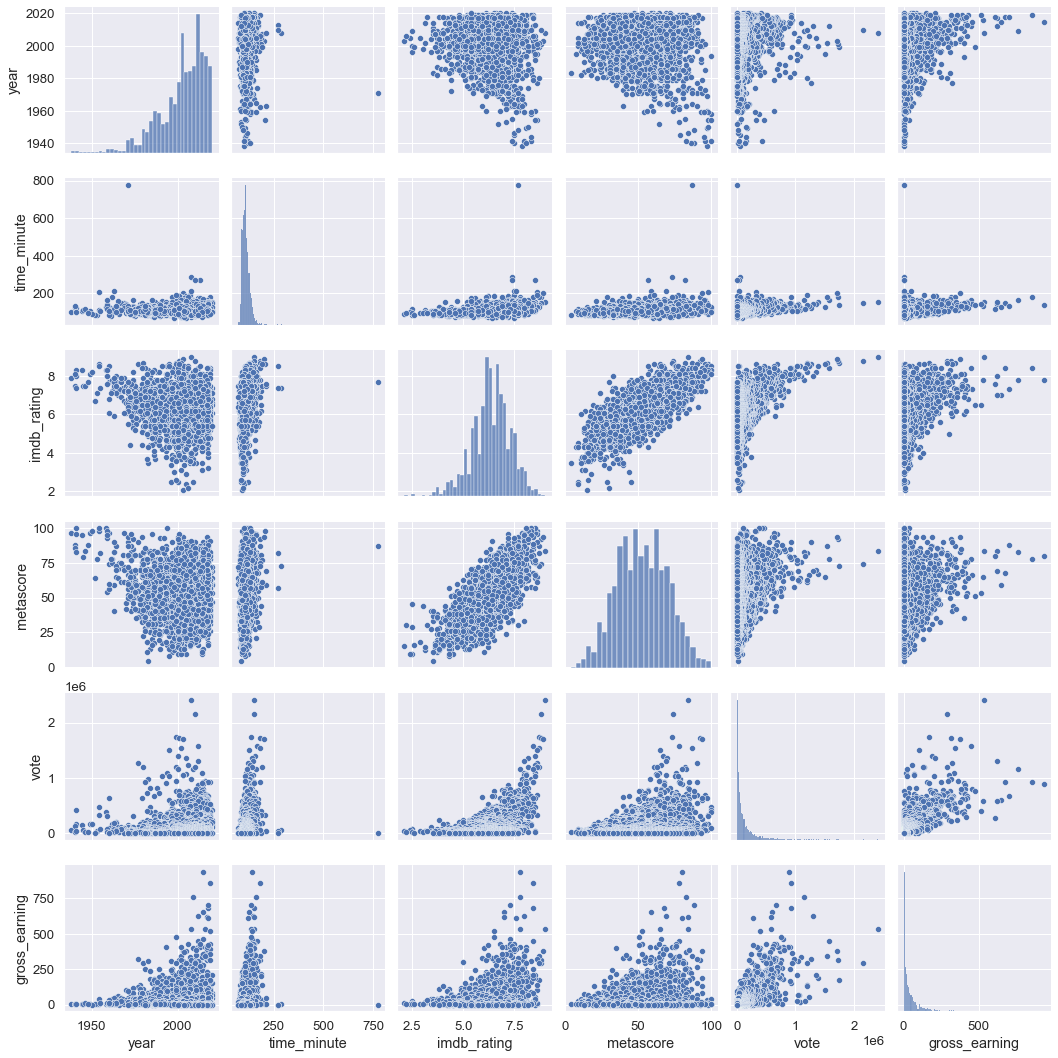

In [78]:
sns.pairplot(movies)

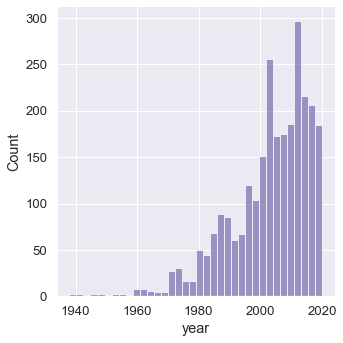

In [79]:
sns.displot(movies['year'], kde=False,color='m');

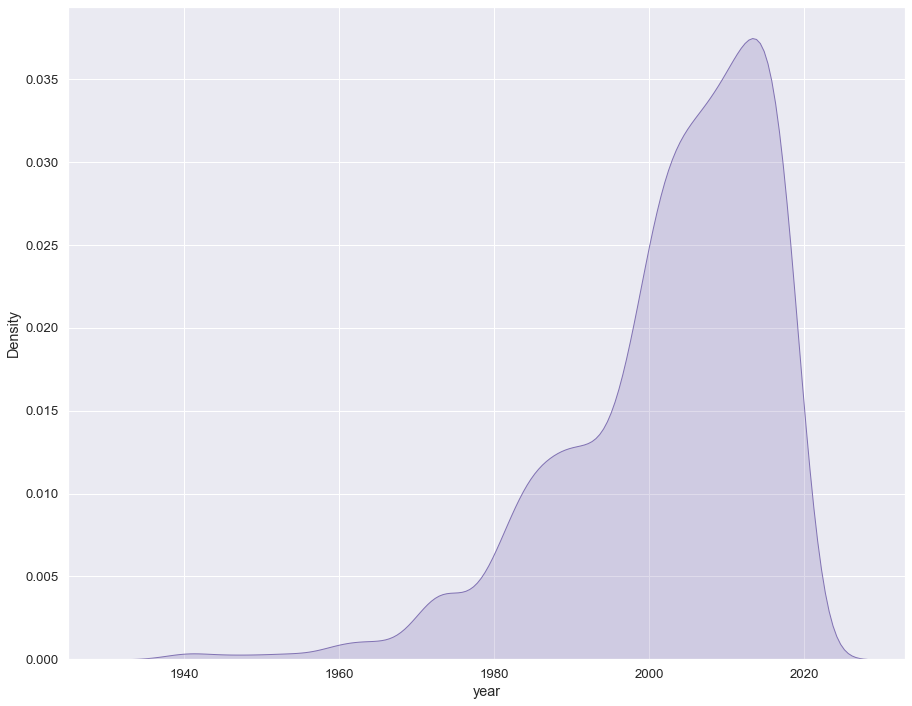

In [80]:
sns.kdeplot(movies['year'], shade=True, color='m');

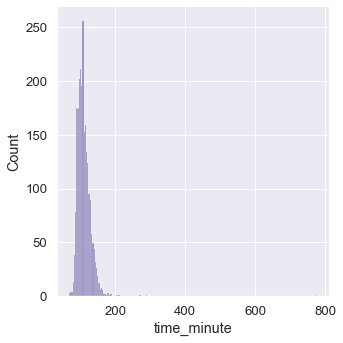

In [81]:
sns.displot(movies['time_minute'], kde=False,color='m');

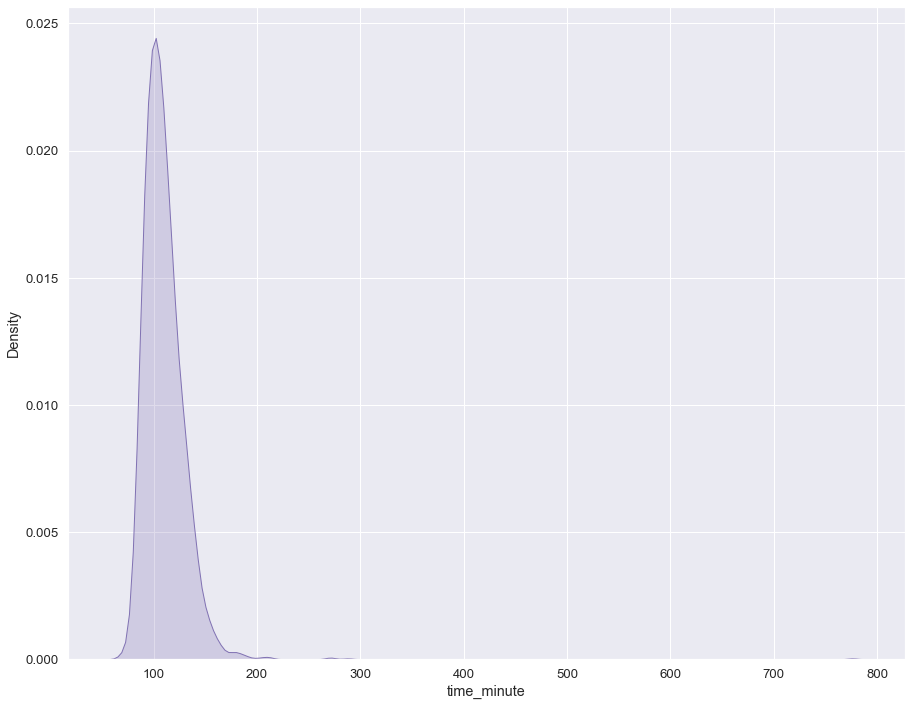

In [82]:
sns.kdeplot(movies['time_minute'], shade=True, color='m');

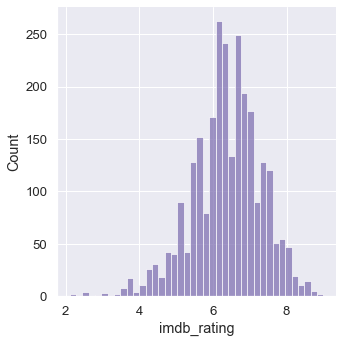

In [83]:
sns.displot(movies['imdb_rating'], kde=False,color='m');

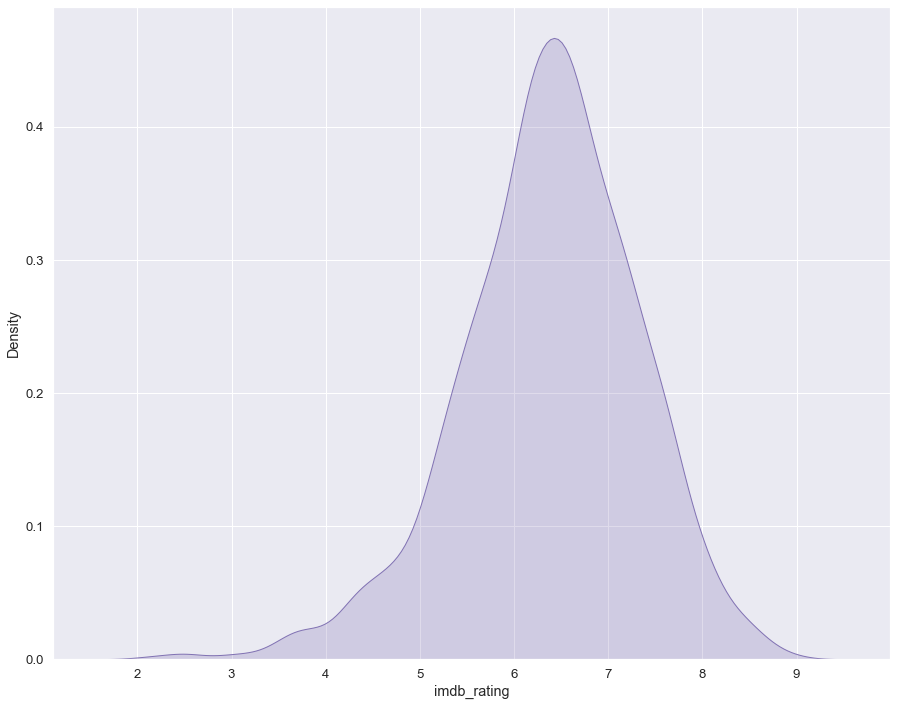

In [84]:
sns.kdeplot(movies['imdb_rating'], shade=True, color='m');

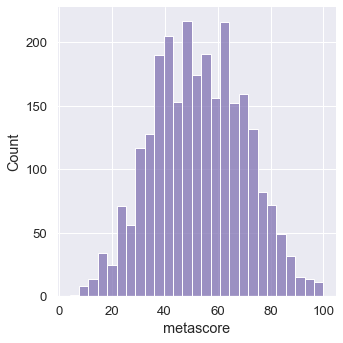

In [85]:
sns.displot(movies['metascore'], kde=False,color='m');

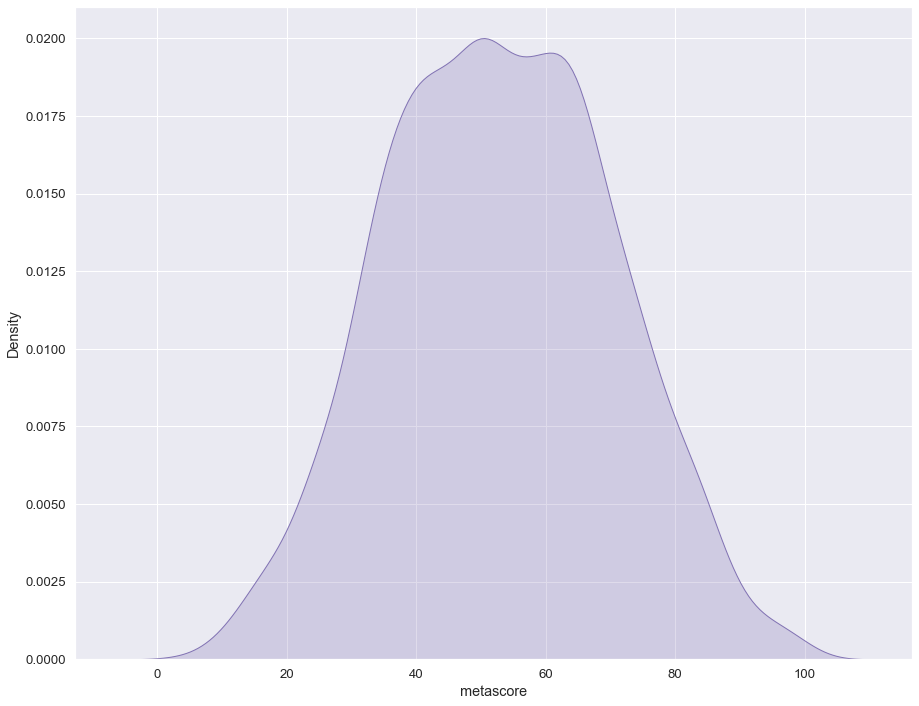

In [86]:
sns.kdeplot(movies['metascore'], shade=True, color='m');

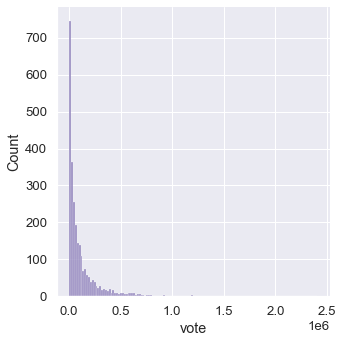

In [87]:
sns.displot(movies['vote'], kde=False,color='m');

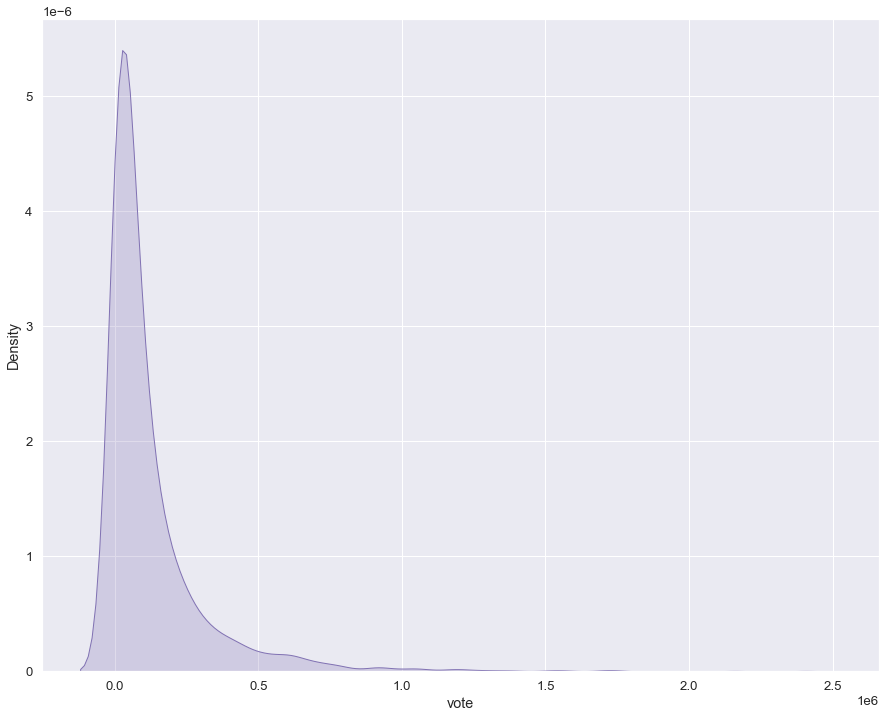

In [88]:
sns.kdeplot(movies['vote'], shade=True, color='m');

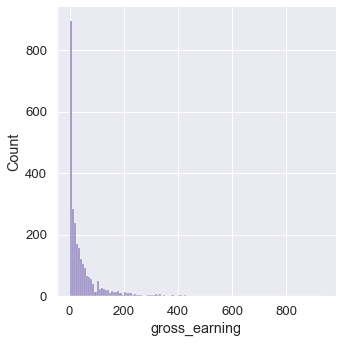

In [89]:
sns.displot(movies['gross_earning'], kde=False,color='m');

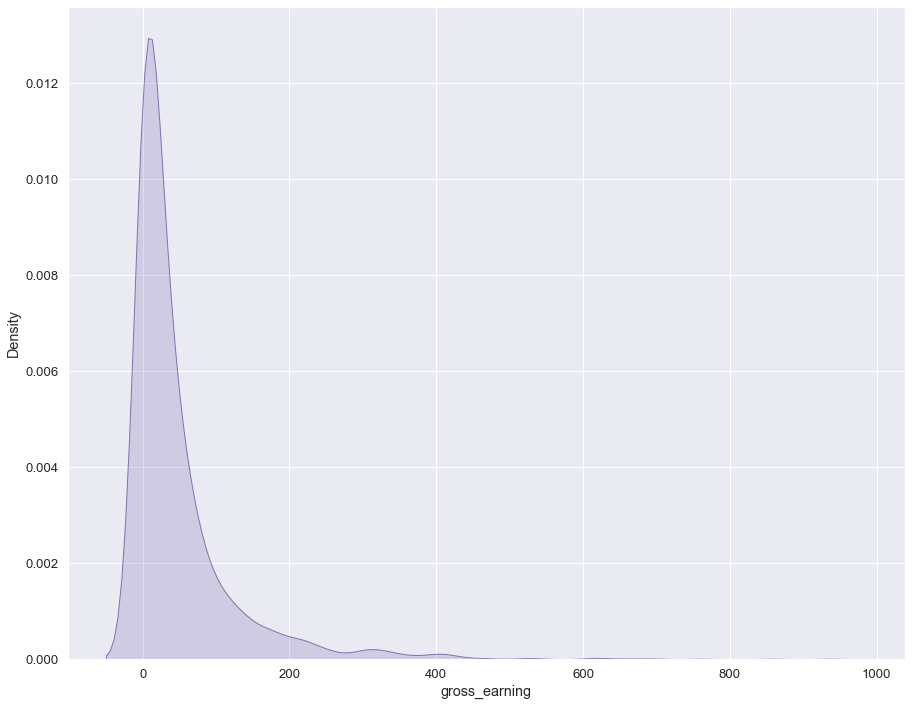

In [90]:
sns.kdeplot(movies['gross_earning'], shade=True, color='m');

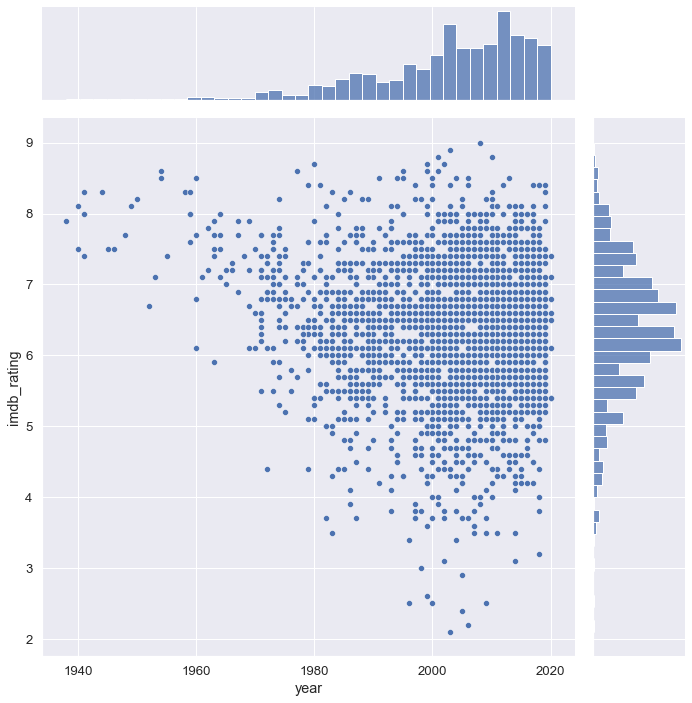

In [91]:
sns.jointplot(x='year', y='imdb_rating', data=movies,height=10, kind='scatter')


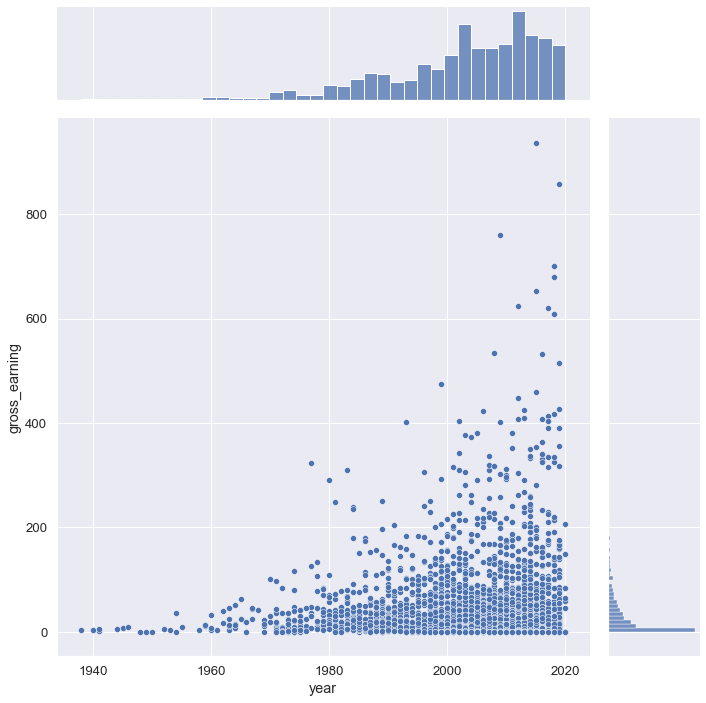

In [92]:
sns.jointplot(x='year', y='gross_earning', data=movies,height=10, kind='scatter')


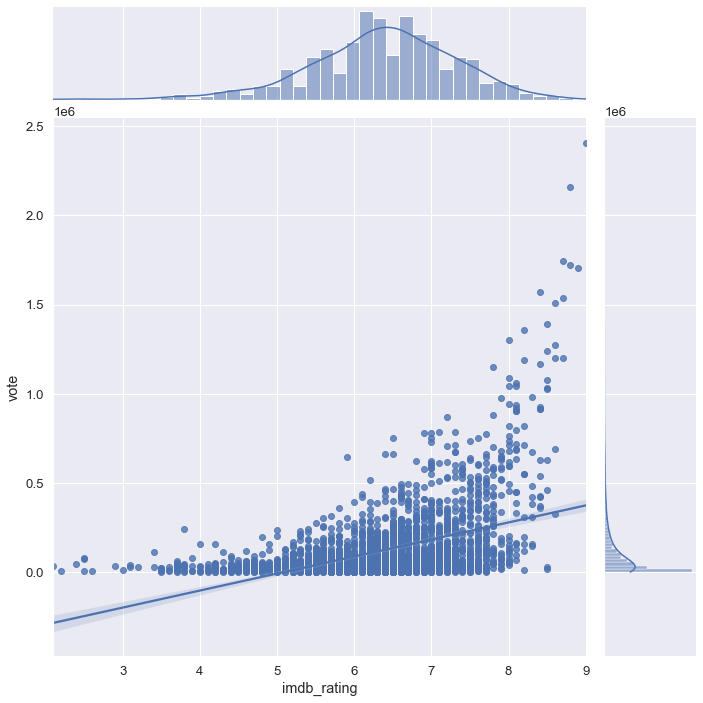

In [93]:
sns.jointplot(x='imdb_rating', y='vote', data=movies,height=10, kind='reg')


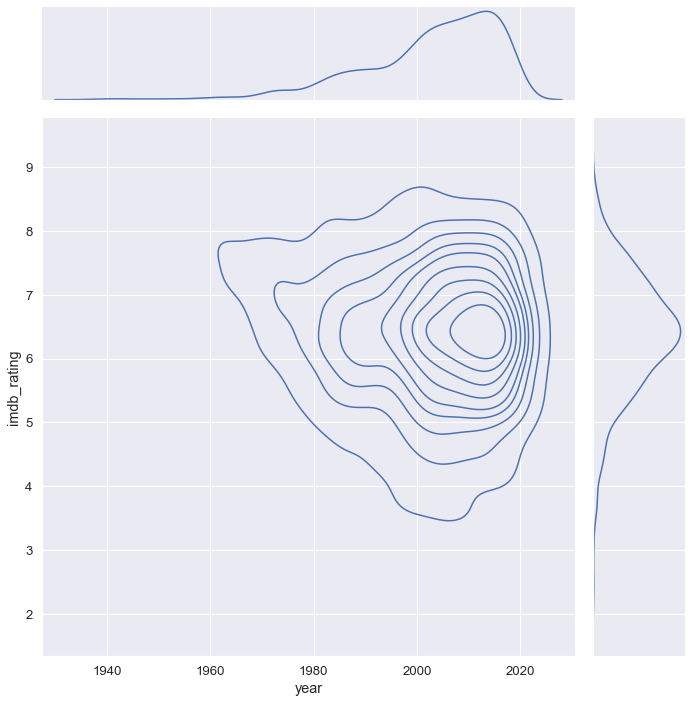

In [94]:
sns.jointplot(x='year', y='imdb_rating', data=movies,height=10, kind='kde')


In [95]:
temp = movies.genre.value_counts()
temp2 = temp.head(10)

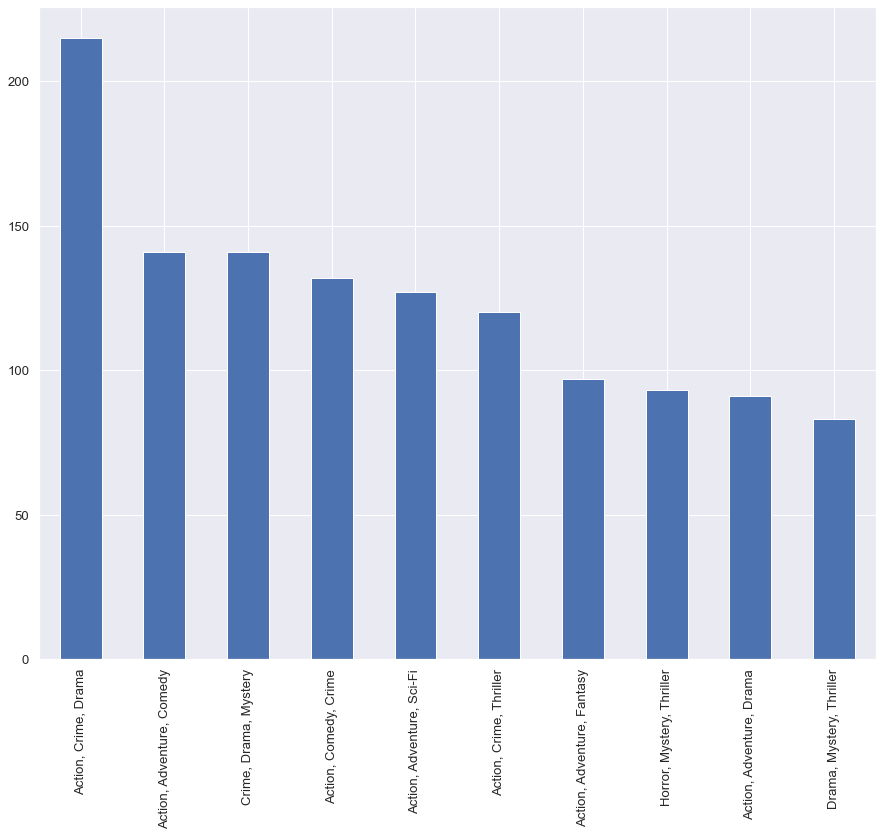

In [96]:
temp2.plot(kind='bar');


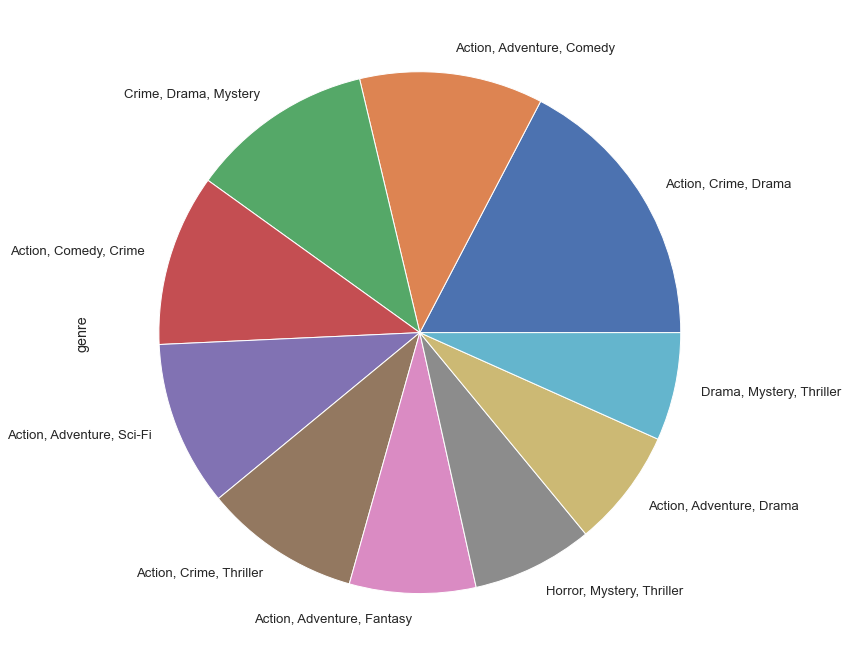

In [97]:
temp2.plot(kind='pie');


<AxesSubplot:>

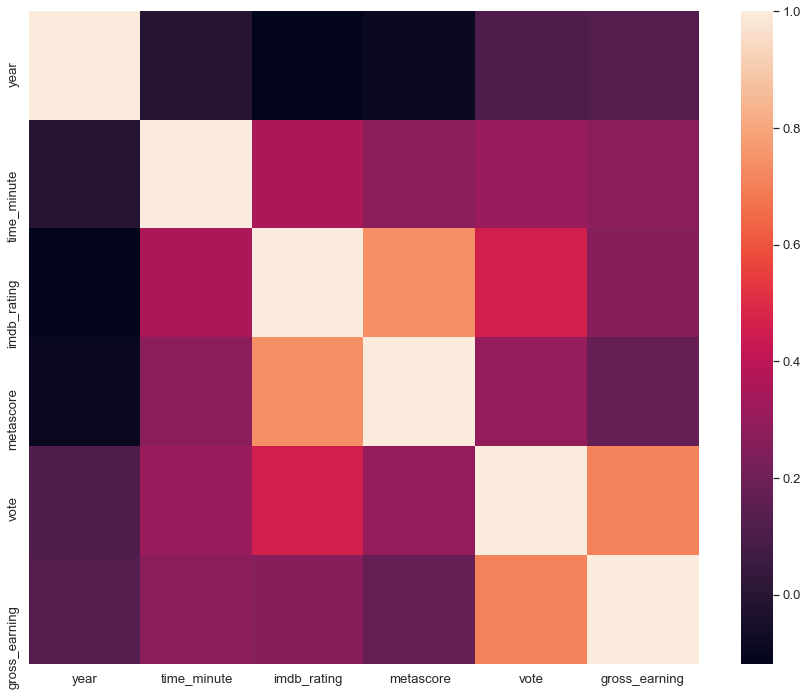

In [98]:
sns.heatmap(movies.corr())


# Machine learning 

In [100]:
import joblib

In [132]:
from sklearn import preprocessing
le1=preprocessing.LabelEncoder()
movies['genre']=le1.fit_transform(movies['genre'])
joblib.dump(le1,'GenreEncoding.joblib')


['GenreEncoding.joblib']

In [133]:
movies

,movie,year,time_minute,imdb_rating,metascore,vote,gross_earning,genre
0,The Dark Knight,2008,152.0,9.0,84.0,2407428,534.86,34
1,Inception,2010,148.0,8.8,74.0,2159698,292.58,12
3,The Matrix,1999,136.0,8.7,73.0,1745004,171.48,71
4,The Lord of the Rings: The Fellowship of the Ring,2001,178.0,8.8,92.0,1724248,315.54,5
5,The Lord of the Rings: The Return of the King,2003,201.0,8.9,94.0,1703012,377.85,5
...,...,...,...,...,...,...,...,...
19166,Submission,2017,106.0,5.7,52.0,1261,0.04,175
19404,Rollover,1981,116.0,5.4,36.0,1214,10.85,176
19665,The Reconstruction of William Zero,2014,98.0,5.4,57.0,1165,0.00,177
19719,War of the Worlds: Goliath,2012,85.0,5.4,33.0,1158,0.01,95


In [103]:
movies.drop('movie', axis=1,inplace=True)
movies

,year,time_minute,imdb_rating,metascore,vote,gross_earning,genre
0,2008,152.0,9.0,84.0,2407428,534.86,34
1,2010,148.0,8.8,74.0,2159698,292.58,12
3,1999,136.0,8.7,73.0,1745004,171.48,71
4,2001,178.0,8.8,92.0,1724248,315.54,5
5,2003,201.0,8.9,94.0,1703012,377.85,5
...,...,...,...,...,...,...,...
19166,2017,106.0,5.7,52.0,1261,0.04,175
19404,1981,116.0,5.4,36.0,1214,10.85,176
19665,2014,98.0,5.4,57.0,1165,0.00,177
19719,2012,85.0,5.4,33.0,1158,0.01,95


In [104]:
from sklearn.model_selection import train_test_split


In [105]:
x = movies.drop('gross_earning', axis=1)
y = movies['gross_earning']

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [108]:
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [110]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [111]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}') 
    y_pred = model.predict(x_test)
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print('-----------------------------------------------------------')

Using model: LR
Training Score: 0.5277988372457714
Test Score: 0.5600886468369914
RMSE: 43.09565703715926
-----------------------------------------------------------
Using model: KNNR
Training Score: 0.768806610849341
Test Score: 0.6306951056103227
RMSE: 39.48602834023677
-----------------------------------------------------------
Using model: SVR
Training Score: 0.23985343321672048
Test Score: 0.35961568633844976
RMSE: 51.99615908390058
-----------------------------------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.23948827816703522
RMSE: 56.663562723859386
-----------------------------------------------------------
Using model: RF
Training Score: 0.953958862089521
Test Score: 0.7313382011878029
RMSE: 33.67858840475527
-----------------------------------------------------------
Using model: XGBR
Training Score: 0.9947713810487433
Test Score: 0.7244888381534842
RMSE: 34.10519368906698
-----------------------------------------------------------


### will choose the xgbr model

In [135]:
model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
y_pred = model.predict(x_test)
y_pred

array([ 1.51246967e+01,  6.77570724e+01,  1.84155064e+01, -8.99264574e-01,
        4.79566431e+00,  2.41856232e+01,  1.92630615e+01,  1.64949918e+00,
        6.51397419e+00,  2.41094685e+01,  4.62862206e+01,  4.28538399e+01,
        3.91401482e+01,  1.12572451e+01,  1.16500711e+01,  2.90358772e+01,
        4.24342346e+00,  2.83737850e+01,  3.89227486e+01,  4.41395378e+01,
        1.48888130e+01,  3.09270992e+01,  7.48282623e+01,  8.67843246e+00,
        6.82297516e+01,  1.76244324e+02,  8.38228226e+01,  2.04905682e+01,
       -7.34244013e+00,  1.12051239e+01,  6.85234833e+01,  8.14858627e+01,
        8.51402164e-01,  3.99827194e+01,  2.52366714e+01,  3.44394875e+01,
        1.02583694e+01,  2.48188996e+00,  7.37333536e+00,  3.22082825e+01,
        7.37230301e+00,  2.37190380e+01,  2.23475677e+02,  5.89772827e+02,
        2.31416512e+01,  4.35347557e+01,  1.14558783e+01,  9.80098546e-01,
        4.70554199e+01,  2.04188609e+00, -5.76065493e+00,  1.03218670e+01,
        1.12727272e+02,  

In [137]:
y_test

1364      14.84
899       38.91
987       19.98
4305       4.97
8520       0.05
          ...  
58       146.41
1065      59.95
10080      7.22
241      171.02
13149      0.00
Name: gross_earning, Length: 535, dtype: float64

In [138]:
joblib.dump(model, 'MLmodel.h5')

['MLmodel.h5']

In [139]:
joblib.dump(scaler, 'MLscaler.h5')

['MLscaler.h5']

In [140]:
test_data = [2020,155.00,9.00,75.00,33000,55]

In [141]:
test_data = scaler.transform([test_data])

In [142]:
model.predict(test_data)

array([26.97668], dtype=float32)